In [ ]:
# Download the LJSpeech dataset
# Need to run this in a jupyter kernel
%%bash

if [ ! -d "./data" ]; then
    mkdir data
fi

if [ ! -d "./data/LJSpeech-1.1" ]; then
    curl -o ./data/LJSpeech-1.1.tar.bz2 https://keithito.com/LJSpeech-1.1.tar.bz2
    tar -xjf ./data/LJSpeech-1.1.tar.bz2 -C ./data
else
    echo "LJSpeech dataset already exists. Skipping download."
fi

SyntaxError: invalid syntax (3221665036.py, line 4)

In [29]:
%load_ext autoreload
%autoreload 2

from importlib import reload
from DataLoader import LJSpeechDataset
from pathlib import Path
import utils
from IPython.display import Audio


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2026-02-20 01:54:34,786 - INFO - Loading dataset from /Users/anubhav.sharma/Development/personal/1508/ECE1508/data/LJSpeech-1.1/wavs...


Current working directory: /Users/anubhav.sharma/Development/personal/1508/ECE1508/Code
Dataset path: /Users/anubhav.sharma/Development/personal/1508/ECE1508/data/LJSpeech-1.1
Number of samples in the dataset: 13100
Sample text: The inspectors paid tribute to the excellence of the motives of these philanthropic ladies, and recognized the good they did.
Sample audio shape: (158621,)


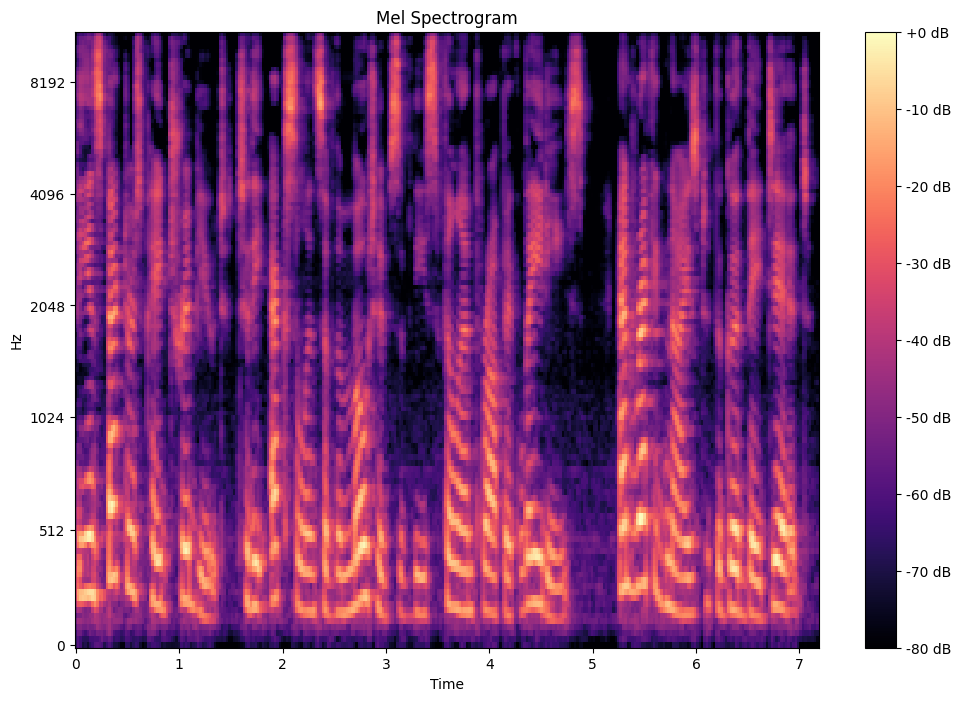

In [30]:
print(f"Current working directory: {Path.cwd()}")
dataset_path = Path(Path.cwd().parent) / "data/LJSpeech-1.1"
print(f"Dataset path: {dataset_path.resolve()}")

dataset = LJSpeechDataset(dataset_path)
print(f"Number of samples in the dataset: {len(dataset)}")
if len(dataset) > 0:
    sample = dataset[0]
    print(f"Sample text: {sample.text}")
    print(f"Sample audio shape: {sample.audio.shape}")
else:
    print("No samples found in the dataset. Check your data directory and metadata.csv.")


utils.plot_audio_mel_spectrogram(sample.audio, sample.sample_rate)
Audio(sample.audio, rate=sample.sample_rate)